# Asbestos Permits Analysis

## By: Amy Zhang

##### Dataset: [Asbestos Permit Data](https://data.wprdc.org/dataset/allegheny-county-asbestos-permit/resource/0a5408a4-8358-4b14-9317-090db7c61fd9)

#### Measurement- Ease of which rats can be left alone
One measure of rat family "sliving" (slaying, living) is how great of a chance that pesky humans will not encroach on their space. Asbestos permits are a great way to measure the abandonment of buidings, as very few humans will be here, guaranteeing the rats no need to share a living space with people that want to kill them. 

The way this is measured is by ranking the top 15 neighborhoods with the most active asbestos permits.

In [69]:
# Load in asbestos permits dataset
asbestos = pd.read_csv("Asbestos.csv")
asbestos.head()

#Narrow it down to only active ones (status column is active)
asbestos_active= asbestos[asbestos["status"]== "ACTIVE"]
#count = len(newAsbestos)
#print(row_count)
asbestos_active.head()

,_id,permit_number,s_name,s_address,city,z_code,p_fee,pa_license_no,contractor_name,permit_specifications,...,i_date,e_date,achd_inspector,job_complete,is_permit_date_extended,permit_o_e_date,project_type,status,latitude,longitude
915,1878800,PAA232002,DUQUESNE LIGHT COMPANY- 2825 NEW BEAVER AVE,NaN,PITTSBURGH,15233,850.0,918.0,DUQUESNE LIGHT COMPANY,REMOVE ARC-PROOF TAPE/PROOFING CEMENT IN VARIO...,...,2023-01-01,2023-12-31,CALI FEENEY,f,f,2023-12-31,PAA,ACTIVE,40.463914,-80.045183
1079,1878964,PAA234088,MUNICIPALITY REGULATED PROPERTY,320 COLLINS DRIVE,PITTSBURGH,15235,350.0,902.0,"AMERICAN CONTRACTING ENTERPRISES, INC.",REMOVE ASBESTOS CONTAINING DEBRIS THROUGHOUT S...,...,2023-01-23,2023-12-31,JOE YAKUBISIN,NaN,NaN,NaN,PAA,ACTIVE,40.465340,-79.812024
1193,1879078,PAA234055,CITY OF MCKEESPORT REGULATED PROPERTY,910 SOLES STREET,MCKEESPORT,15132,350.0,971.0,"TRIFECTA TEAM, LLC",DEMO IN PLACE - UNSAFE STRUCTURE,...,2023-01-23,2024-01-23,JOE YAKUBISIN,NaN,NaN,NaN,PAA,ACTIVE,40.347608,-79.848797
1194,1879079,PAA234074,CITY OF MCKEESPORT REGULATED PROPERTY,705 VERNER ALLEY,MCKEESPORT,15132,350.0,971.0,"TRIFECTA TEAM, LLC",DEMO IN PLACE - UNSAFE STRUCTURE,...,2023-01-23,2024-01-23,JOE YAKUBISIN,NaN,NaN,NaN,PAA,ACTIVE,40.349502,-79.856440
1241,1879126,PAA234054,CITY OF MCKEESPORT REGULATED PROPERTY,908 SOLES STREET,MCKEESPORT,15132,350.0,971.0,"TRIFECTA TEAM, LLC",DEMO IN PLACE - UNSAFE STRUCTURE,...,2023-01-23,2024-01-23,JOE YAKUBISIN,NaN,NaN,NaN,PAA,ACTIVE,40.347678,-79.848843


I filtered the data to include only the “active” status permits, as the “complete” status could mean the building or zone is already renovated or demolished. It would be nice for the rats to have a nice renovated home, but I did not want to take the chance that the building was no longer standing. This could also mean this zone is an active construction area, meaning there is increased danger around as it is a heavily tafficked area with many humans and construction machines around. We cannot have that for our rat family. An active status could mean that the building is simply being prepared for renovation or demolition, and a lot of them stand empty and abandoned for months before demolition. This guarantees that there are no meddling people or construction workers, ensuring survival for our rats. 

[source](https://www.alleghenycounty.us/uploadedFiles/Allegheny_Home/Health_Department/Programs/Air_Quality/2022_Asbestos-Fact-Sheet-new.pdf )


In [91]:
# create a data dict for the columns
newAsbestos = pd.DataFrame(columns=['permit number', 'lat', 'long', 'neighborhood'])
newAsbestos = newAsbestos.astype({
    "permit number": str,
    "lat": float,
    "long": float,
    "neighborhood": str
})
# new columns
newAsbestos["permit number"] = asbestos_active["permit_number"]
newAsbestos["lat"] = asbestos_active["latitude"]
newAsbestos["long"] = asbestos_active["longitude"]

newAsbestos.head()

,permit number,lat,long,neighborhood
915,PAA232002,40.463914,-80.045183,NaN
1079,PAA234088,40.465340,-79.812024,NaN
1193,PAA234055,40.347608,-79.848797,NaN
1194,PAA234074,40.349502,-79.856440,NaN
1241,PAA234054,40.347678,-79.848843,NaN


In [103]:
# Use fpsnippets to get permits sorted into neighborhoods, fill neighborhood columns with names
for index, row in newAsbestos.iterrows():
    latit = row["lat"]
    longi= row["long"]
    neighborhood_name= fpsnippets.geo_to_neighborhood(latit,longi)
    newAsbestos.loc[index, 'neighborhood'] = neighborhood_name
newAsbestos.head(20)

,permit number,lat,long,neighborhood
915,PAA232002,40.463914,-80.045183,Marshall-Shadeland
1079,PAA234088,40.465340,-79.812024,None
1193,PAA234055,40.347608,-79.848797,None
1194,PAA234074,40.349502,-79.856440,None
1241,PAA234054,40.347678,-79.848843,None
1242,PAA234059,40.346880,-79.848437,None
1261,PAA234060,40.346362,-79.848383,None
1271,PAA234066,40.341071,-79.849485,None
1475,PAA234075,40.348036,-79.853904,None
1578,DEM220308,40.493368,-79.783177,None


I am only interested in the datapoints that contain a neighborhood in Pittsburgh, so I used a query mask to exclude the Neighborhoods with "None".

In [107]:
# Exclude none neighborhoods
neighborhood_notNone_mask = (newAsbestos['neighborhood'].notnull())

# Apply the mask to filter the DataFrame
filtered_newAsbestos = newAsbestos[neighborhood_notNone_mask]

# Display the filtered DataFrame
filtered_newAsbestos.head()

,permit number,lat,long,neighborhood
915,PAA232002,40.463914,-80.045183,Marshall-Shadeland
2885,PAA220604,40.442581,-79.961792,West Oakland
4487,PAA230027,40.442247,-79.960929,West Oakland
5459,PAA224562,40.470131,-80.026204,Marshall-Shadeland
5507,PAA220599,40.444310,-79.953197,North Oakland


An additional step so we can see the ones that fall on the bottom and the top of the rankings is creating a new csv out of this dataframe:

In [111]:
# change into a csv
filtered_newAsbestos.to_csv("filtered_newAsbestos.csv", sep=',', index= False, encoding = 'utf-8')

Now, it's time to rank the neighborhoods based on the ones with the most active asbestos permits!

In [112]:
# count the stuff
filtered_newAsbestos['neighborhood'].value_counts()

Central Business District    24
Homewood North               15
North Oakland                12
West Oakland                 11
Squirrel Hill North           7
Marshall-Shadeland            6
Spring Garden                 6
Central Oakland               6
Bluff                         5
Perry North                   5
Shadyside                     4
Perry South                   4
South Side Flats              4
Bloomfield                    4
East Hills                    3
Squirrel Hill South           3
Central Northside             3
Lincoln-Lemington-Belmar      3
Fineview                      2
Beechview                     2
Sheraden                      2
Knoxville                     2
Allegheny Center              2
Brighton Heights              2
Elliott                       2
Chateau                       2
Fairywood                     2
Homewood South                1
Hazelwood                     1
Spring Hill-City View         1
Overbrook                     1
Westwood

Let's visualize...

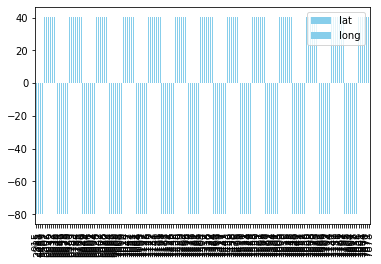

In [115]:
filtered_newAsbestos.plot(kind='bar', color='skyblue')

This basic way of plotting only plotted the coordinates. That shows me nothing!! Second try:

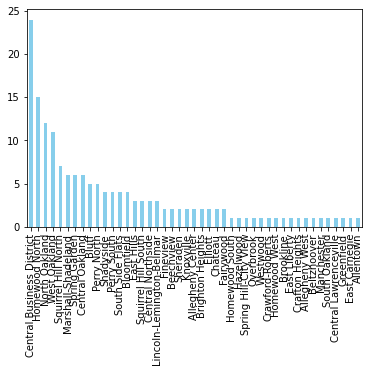

In [116]:
# oh thats not...

# plot the count
counts = filtered_newAsbestos['neighborhood'].value_counts()
counts.plot(kind='bar', color='skyblue')

Since I am only interested in seeing the neighborhoods with the most active asbestos permits, I just want to see the top 15:

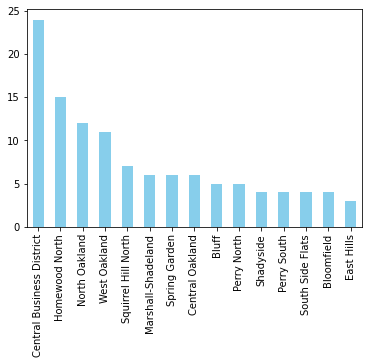

In [118]:
# only do the top 15
counts.head(15).plot(kind='bar', color='skyblue')

And the winner is obvious. The Central Business District comes in at #1 with 24 active asbestos permits!! Typically, buildings have these permits when they are preparing to be demolished (think tented, abandonded, uncared for). This would be a perfect environment for our family of rats to settle in. Rats are hardy creatures, so they can get their footing here amidst the dilapidated buildings. 